In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
dataname = "dewe_raw.csv"

df = pd.read_csv(f"../data/prüfstand/cut/{dataname}")
df.head()

d_border = []
q_border = []
for deg in range(181):
    d_border.append(625*np.cos(np.deg2rad(90+deg)))
    q_border.append(625*np.sin(np.deg2rad(90+deg)))
    
#df = df.iloc[30:2910]
plt.style.use("ggplot")

In [3]:
df.head()


Time        id        iq          ud          uq    omega_el
0  0.00198 -0.862727  0.817851   -0.071073    0.082712  387.538504
1  0.00200 -0.940910 -0.728681    0.276157    0.100413  387.646685
2  0.00202 -3.198529  1.166569 -322.913861  396.790761  387.755726
3  0.00204 -0.178784  1.013732    0.040696    0.553163  387.865626
4  0.00206 -0.178863 -0.652158   -0.028929    0.583634  387.976387

In [4]:
df["IQAI_V_VoltNormBase_Ie"] = 1
df.columns = ["Time","IQCP_I_IdMeasRaw_Ie","IQCP_I_IqMeasRaw_Ie","IQCC_r_VdCmd_Ie","IQCC_r_VqCmd_Ie","IQPP_w_SpdElecRaw_Ve","IQAI_V_VoltNormBase_Ie"]
#df.columns = ["IQCP_I_IdMeasRaw_Ie","IQCP_I_IqMeasRaw_Ie","IQCC_r_VdCmd_Ie","IQCC_r_VqCmd_Ie"]
#df.to_csv(f"./data/prüfstand/cut/{dataname}")

In [5]:
df.describe()

Time  IQCP_I_IdMeasRaw_Ie  IQCP_I_IqMeasRaw_Ie  \
count  1.555983e+07         1.555983e+07         1.555983e+07   
mean   1.556003e+02        -2.393353e+02         5.857201e-01   
std    8.983472e+01         1.750404e+02         2.994309e+02   
min    1.980000e-03        -6.499912e+02        -6.490282e+02   
25%    7.780112e+01        -3.805086e+02        -2.287097e+02   
50%    1.556003e+02        -2.240897e+02         2.236153e+00   
75%    2.333994e+02        -8.256204e+01         2.299662e+02   
max    3.111986e+02         7.047556e+01         6.518186e+02   

       IQCC_r_VdCmd_Ie  IQCC_r_VqCmd_Ie  IQPP_w_SpdElecRaw_Ve  \
count     1.555983e+07     1.555983e+07          1.555983e+07   
mean     -3.516132e+00     2.799292e+01          4.188747e+02   
std       1.344619e+02     1.055865e+02          2.914101e+00   
min      -8.928659e+02    -8.742431e+02          3.591498e+02   
25%       9.743848e-02    -2.735297e-01          4.160877e+02   
50%       8.543047e-01     6.697492e-01          4.188744e+02   
75%       1.714720e+00     2.087408e+00          4.216734e+02   
max       8.884580e+02     8.761832e+02          4.452649e+02   

       IQAI_V_VoltNormBase_Ie  
count              15559830.0  
mean                      1.0  
std                       0.0  
min                       1.0  
25%                       1.0  
50%                       1.0  
75%                       1.0  
max                       1.0

c:\Users\JANLUKS\Desktop\dokumente\python\ML\FluxNN\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


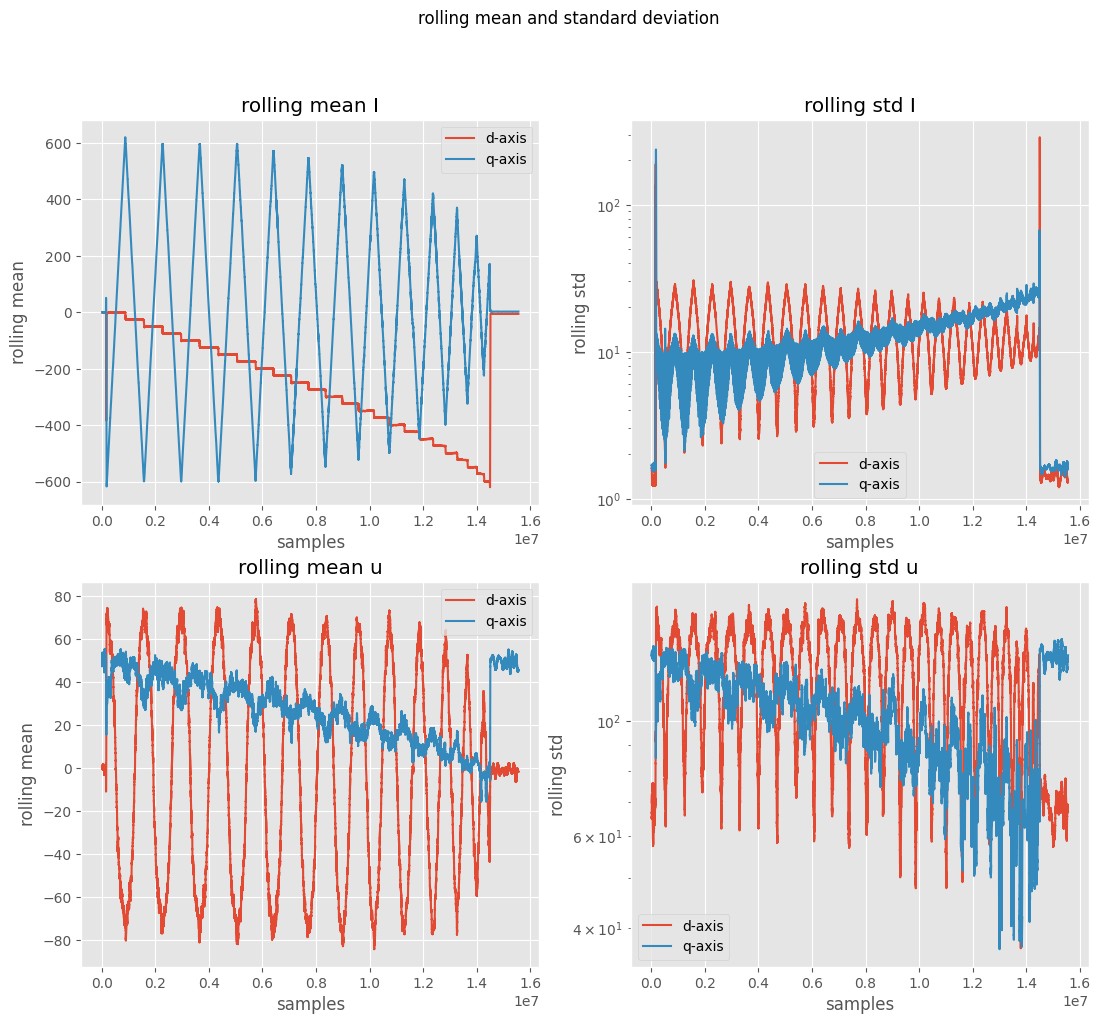

In [7]:
rolling_mean = df.rolling(window=10000).mean()
rolling_std = df.rolling(window=10000).std()

plt.figure(figsize=(13,11))
plt.subplot(2,2,1)
plt.plot(rolling_mean[["IQCP_I_IdMeasRaw_Ie","IQCP_I_IqMeasRaw_Ie"]])
plt.title("rolling mean I")
plt.xlabel("samples")
plt.ylabel("rolling mean")
plt.legend(["d-axis","q-axis"])

plt.subplot(2,2,2)
plt.semilogy(rolling_std[["IQCP_I_IdMeasRaw_Ie","IQCP_I_IqMeasRaw_Ie"]])
plt.title("rolling std I")
plt.xlabel("samples")
plt.ylabel("rolling std")
plt.legend(["d-axis","q-axis"])

plt.subplot(2,2,3)
plt.plot(rolling_mean[["IQCC_r_VdCmd_Ie","IQCC_r_VqCmd_Ie"]])
plt.title("rolling mean u")
plt.xlabel("samples")
plt.ylabel("rolling mean")
plt.legend(["d-axis","q-axis"])

plt.subplot(2,2,4)
plt.semilogy(rolling_std[["IQCC_r_VdCmd_Ie","IQCC_r_VqCmd_Ie"]])
plt.title("rolling std u")
plt.xlabel("samples")
plt.ylabel("rolling std")
plt.legend(["d-axis","q-axis"])

plt.suptitle("rolling mean and standard deviation")
plt.show()

(np.float64(-677.6337104101874),
 np.float64(95.52807243782561),
 np.float64(-699.5332977458319),
 np.float64(695.8435147393589))

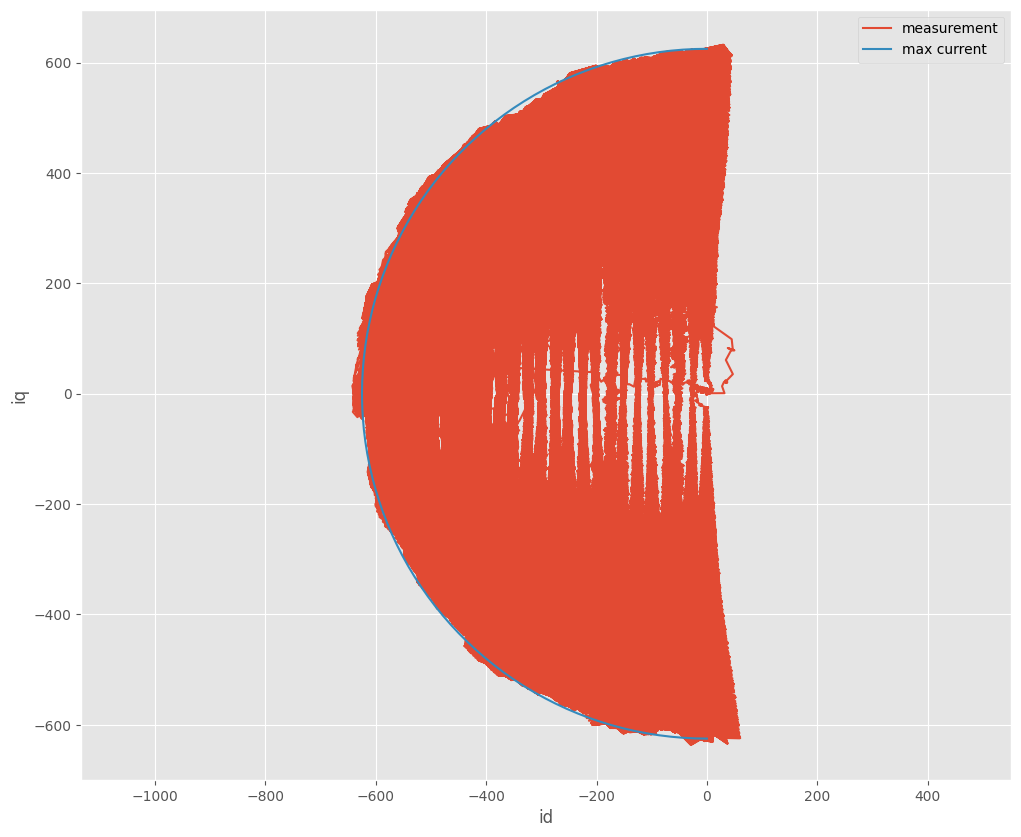

In [27]:

plt.figure(figsize=(12,10))

plt.plot(df["IQCP_I_IdMeasRaw_Ie"],df["IQCP_I_IqMeasRaw_Ie"],label="measurement")
plt.plot(d_border,q_border,label="max current")
plt.legend()
plt.xlabel("id")
plt.ylabel("iq")
plt.axis("equal")

Text(0, 0.5, 'omega_el')

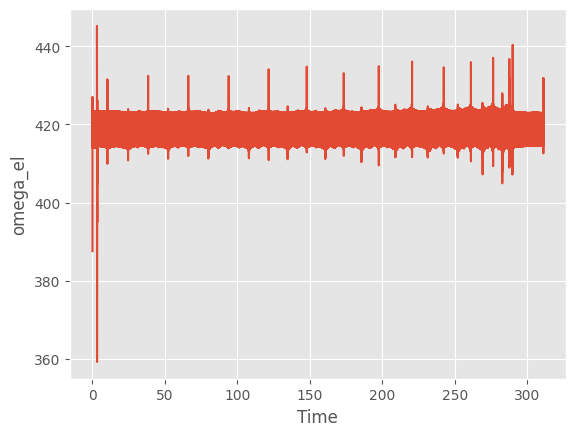

In [8]:
plt.plot(df["Time"],df["IQPP_w_SpdElecRaw_Ve"])
plt.xlabel("Time")
plt.ylabel("omega_el")

In [18]:
150000-2450000

-2300000

(np.float64(-765.2296991912749),
 np.float64(171.76463298883357),
 np.float64(-868.1962241476672),
 np.float64(871.186799833046))

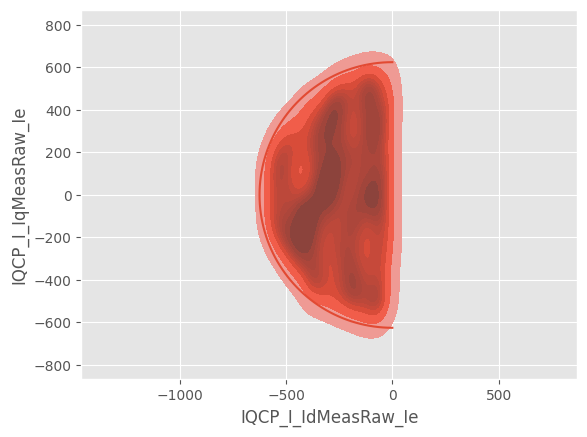

In [29]:
sns.kdeplot(data=df.sample(frac=0.01),x="IQCP_I_IdMeasRaw_Ie",y="IQCP_I_IqMeasRaw_Ie",fill=True)
plt.plot(d_border,q_border,label="max current")
plt.axis("equal")

<Axes: xlabel='Time', ylabel='Temp [°C]'>

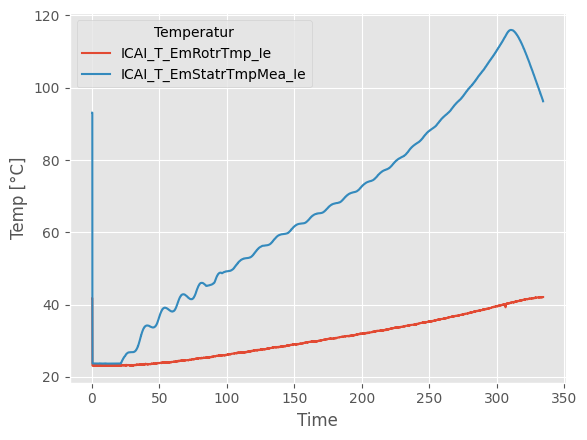

In [75]:
line_plot_df = pd.melt(df,id_vars=["Time"],value_vars=["ICAI_T_EmRotrTmp_Ie","ICAI_T_EmStatrTmpMea_Ie"],var_name="Temperatur",value_name="Temp [°C]")
sns.lineplot(line_plot_df,x="Time",y="Temp [°C]",hue="Temperatur")

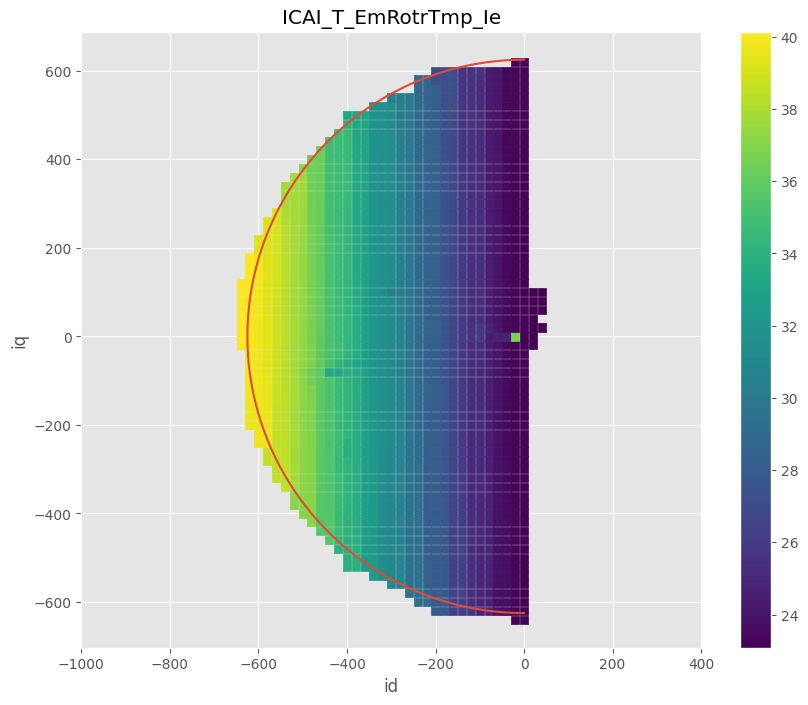

In [76]:

# Definieren Sie die Größe der Rasterzellen
bin_size = 20.0
# Gruppieren Sie die x, y-Werte in Rasterzellen und berechnen Sie den durchschnittlichen z-Wert
df['x_bin'] = (df['IQCP_I_IdMeasRaw_Ie'] // bin_size) * bin_size
df['y_bin'] = (df['IQCP_I_IqMeasRaw_Ie'] // bin_size) * bin_size

# Durchschnittlichen z-Wert für jede Rasterzelle berechnen
df_avg = df.groupby(['x_bin', 'y_bin'], as_index=False)['ICAI_T_EmRotrTmp_Ie'].mean()
df_avg.rename(columns={'ICAI_T_EmRotrTmp_Ie': 'avg_z'}, inplace=True)

# Scatter-Plot mit Seaborn erstellen
plt.figure(figsize=(10, 8))
#sns.scatterplot(data=df_avg, x='x_bin', y='y_bin', hue='avg_z', palette='viridis', legend=None,marker="s")
plt.scatter(df_avg["x_bin"],df_avg["y_bin"],c=df_avg["avg_z"],marker="s")
plt.plot(d_border,q_border,label="max current")
plt.colorbar()
plt.axis("equal")
plt.xlabel('id')
plt.ylabel('iq')
plt.title("ICAI_T_EmRotrTmp_Ie")

plt.show()

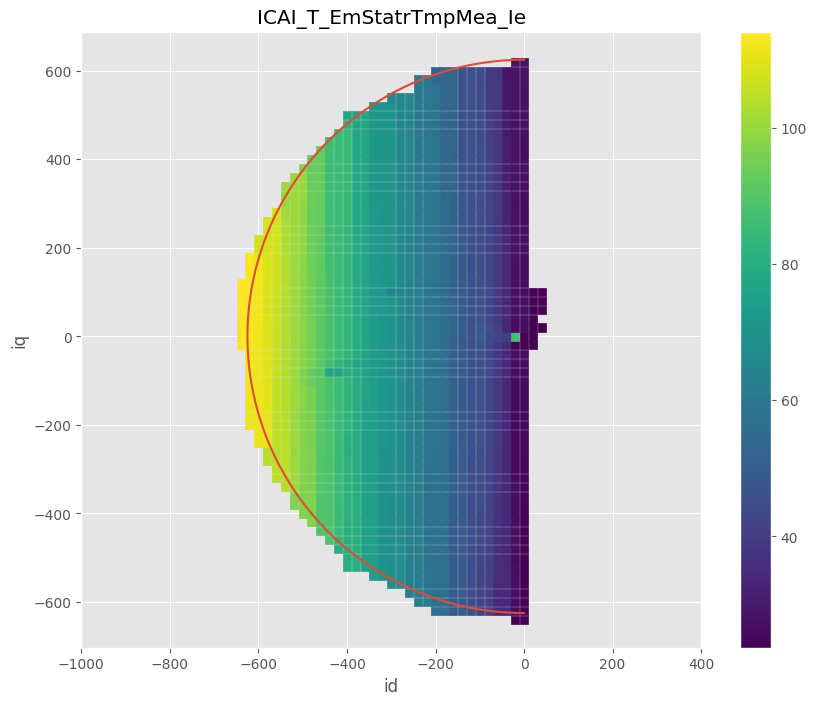

In [77]:

# Definieren Sie die Größe der Rasterzellen
bin_size = 20.0
# Gruppieren Sie die x, y-Werte in Rasterzellen und berechnen Sie den durchschnittlichen z-Wert
df['x_bin'] = (df['IQCP_I_IdMeasRaw_Ie'] // bin_size) * bin_size
df['y_bin'] = (df['IQCP_I_IqMeasRaw_Ie'] // bin_size) * bin_size

# Durchschnittlichen z-Wert für jede Rasterzelle berechnen
df_avg = df.groupby(['x_bin', 'y_bin'], as_index=False)['ICAI_T_EmStatrTmpMea_Ie'].mean()
df_avg.rename(columns={'ICAI_T_EmStatrTmpMea_Ie': 'avg_z'}, inplace=True)

# Scatter-Plot mit Seaborn erstellen
plt.figure(figsize=(10, 8))
#sns.scatterplot(data=df_avg, x='x_bin', y='y_bin', hue='avg_z', palette='viridis', legend=None,marker="s")
plt.scatter(df_avg["x_bin"],df_avg["y_bin"],c=df_avg["avg_z"],marker="s")
plt.plot(d_border,q_border,label="max current")
plt.colorbar()
plt.axis("equal")
plt.xlabel('id')
plt.ylabel('iq')
plt.title("ICAI_T_EmStatrTmpMea_Ie")

plt.show()

Cluster labels: [ 39  39  39 ... 404 286 375]
Centroids: [[ -36.19514962 -197.33704499]
 [-366.09190991  204.64580918]
 [-373.03723275 -385.5860942 ]
 ...
 [ -83.70917768  248.56120002]
 [-425.23793294  -90.44096685]
 [-532.64432356 -163.65748168]]


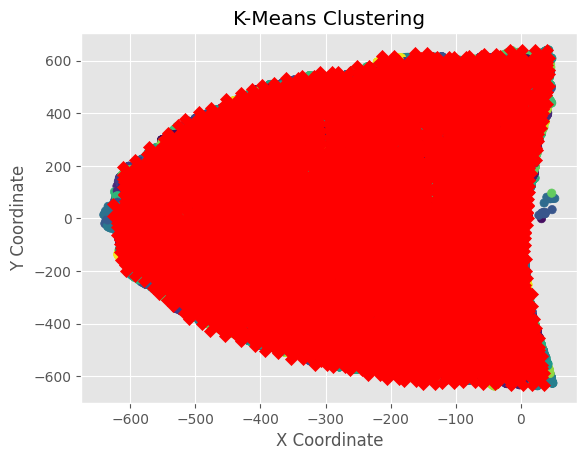

In [13]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Example data: list of (x, y) coordinates
coordinates = df[['IQCP_I_IdMeasRaw_Ie','IQCP_I_IqMeasRaw_Ie']].values

# Number of clusters
num_clusters = 1006

# Create KMeans instance and fit the data
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(coordinates)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Print results
print("Cluster labels:", labels)
print("Centroids:", centroids)

# Plotting the clusters
plt.scatter(coordinates[:, 0], coordinates[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('K-Means Clustering')
plt.show()

In [1]:
import torch
from typing import Tuple
import numpy as np
import plotly.graph_objects as go
import mlflow
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from scipy.spatial import Delaunay
def log_psi_3d_subplot(pred:torch.Tensor,validation_data:dict) -> None:
    axislabels = np.array([[["id [A]","iq [A]","PSI [Wb]"],["id [A]","iq [A]","PSI [Wb]"]]])
    plotnames = np.array([[["psid estimted","psid true"],["psiq estimted","psiq true"]]])
    id = torch.tile(validation_data["i"][:,0],(1,2,1))
    iq = torch.tile(validation_data["i"][:,1],(1,2,1))
    pred = torch.stack([torch.stack([pred[:, 0], pred[:, 1]])]) 
    true  = torch.stack([torch.stack([validation_data["psi"][:, 0], validation_data["psi"][:, 1]])]) 
    z = torch.stack((pred,true),dim=2) 
    return log_3d_subplots(id,iq,z,plotnames,axislabels,"Magnetische Flüsse","Psi.html")
    
def log_3d_subplots(id:torch.Tensor, iq:torch.Tensor, zs:torch.Tensor, plotnames:np.ndarray, axislabels:np.ndarray, title:str,filename:str) -> None:
    """creates a grid of subplots with int the layout rows X cols 

    Args:
        id (torch.Tensor): shape should be (rows,cols,num_datapoints)
        iq (torch.Tensor): shape should be (rows,cols,num_datapoints)
        zs (torch.Tensor): shape should be (rows,cols,surfaces)
        plotnames (np.ndarray): shape should be (rows,cols,surfaces)
        axislabels (np.ndarray):shape should be (rows,cols,3)
        title (str): _description_
        filename (str): _description_
    """
    specs = [[{'type': 'surface'} for c in range(zs.size(1))] for r in range(zs.size(0))]
    fig = make_subplots(rows = zs.size(0), cols=zs.size(1),specs=specs)
    colors = ["yellow","blue"]
    for row in range(zs.size(0)):
        for col in range(zs.size(1)):
            for i,z in enumerate(zs[row,col]):
                points2D = np.vstack([id[row,col],iq[row,col]]).T
                tri = Delaunay(points2D)
                fig.add_trace(
                    go.Mesh3d(
                        x=id[row,col], y=iq[row,col], z=z,
                        i=tri.simplices[:, 0],
                        j=tri.simplices[:, 1],
                        k=tri.simplices[:, 2],
                        name=plotnames[row,col,i],
                        colorscale=[[0,colors[i]],[1,colors[i]]],
                        showlegend=True,
                        showscale=False),
                    row = row+1,
                    col = col+1
                )
            fig.update_scenes(
                xaxis_title_text=axislabels[row,col,0], yaxis_title_text=axislabels[row,col,1], zaxis_title_text=axislabels[row,col,2],
                row=row+1, col=col+1
            )
    fig.update_layout(
        title_text=title,
    )
    
    return fig

In [3]:
import torch
import pandas as pd
lut = pd.read_csv("./data/prüfstand/LUT/lwr_tables1.csv")

t = torch.from_numpy(lut[["psid","psiq"]].values)
val = {"i": torch.from_numpy(lut[["id","iq"]].values), "psi":torch.from_numpy(lut[["psid","psiq"]].values)}
log_psi_3d_subplot(t,val)

